# Dealing with Noisy Data in Datasets

This notebook demonstrates various techniques for dealing with noisy data in datasets, including binning, regression, smoothing, and outlier detection using pandas, NumPy, and scikit-learn.

**Learning Objectives:**
- Understand different approaches to handle noisy data
- Learn binning, regression, and smoothing techniques
- Detect and remove outliers using statistical methods
- Visualize the effects of noise reduction techniques

**Prerequisites:**
- Basic Python programming
- Familiarity with pandas, NumPy, and matplotlib
- Understanding of data preprocessing concepts

In [1]:
# Import the required libraries
from typing import Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.ndimage import uniform_filter1d
from scipy import stats

## Step 1: Generate Noisy Sample Data

We'll create a synthetic dataset with a linear trend plus noise and some outliers to demonstrate noise handling techniques.

In [2]:
# Sample noisy data (x values and corresponding noisy y values)
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, size=x.shape)  # Linear trend + noise

# Generate 5 random outliers
random_outliers = np.random.uniform(low=x.min(), high=x.max(), size=5)
x = np.concatenate([x, random_outliers])

random_outliers = np.random.uniform(
    low=-y.max() * 4, high=y.max() * 4, size=5)
y = np.concatenate([y, random_outliers])

# Order the variables x and y by the values in x
sorted_indices = np.argsort(x)
x = x[sorted_indices]
y = y[sorted_indices]

# Create a DataFrame for ease of manipulation
df = pd.DataFrame({"x": x, "y": y})

## Step 2: Visualize Original Noisy Data

Let's first visualize the original noisy data to see what we're working with.

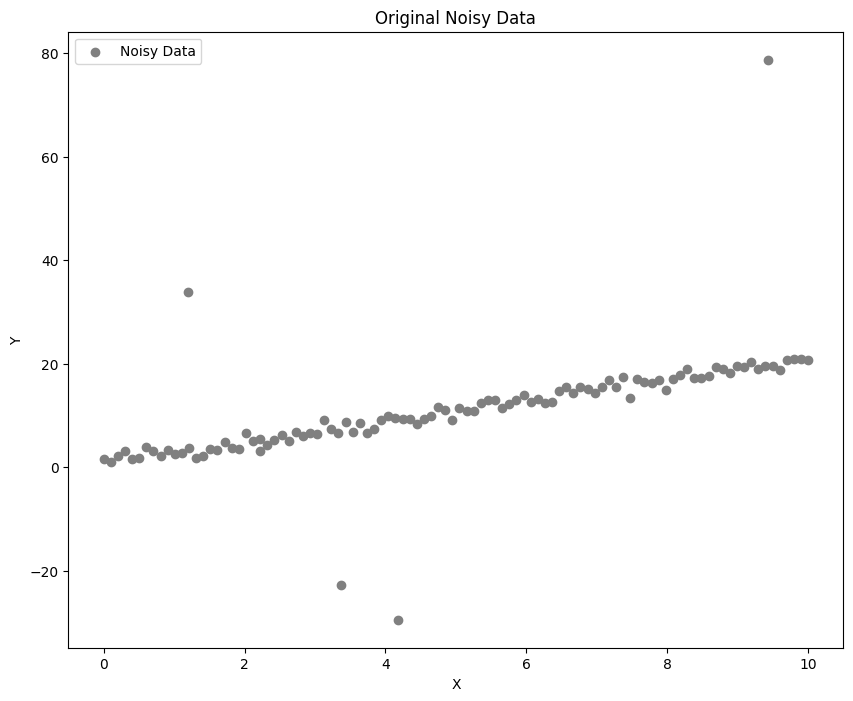

In [3]:
# Plot original noisy data
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color="gray", label="Noisy Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Noisy Data")
plt.legend()
plt.show()

## Step 3: Binning Technique

Binning smooths data by grouping it into bins and calculating the mean of each bin.

In [4]:
def binning(data: pd.Series, bin_size: int) -> Tuple[np.ndarray, int]:
    """Bin the data and calculate the mean of each bin.

    Args:
        data (pd.Series): The data to be binned.
        bin_size (int): The number of bins.

    Returns:
        Tuple[np.ndarray, int]: The bins and the mean of each bin.
    """
    bins = np.linspace(data.min(), data.max(), bin_size)
    bin_indices = np.digitize(data, bins)
    bin_means = [data[bin_indices == i].mean() for i in range(1, len(bins))]
    return bins[1:], bin_means

# Apply binning
bins, binned_data = binning(df["x"], 10)

## Step 4: Visualize Binning Results

Let's visualize the effect of binning on our noisy data.

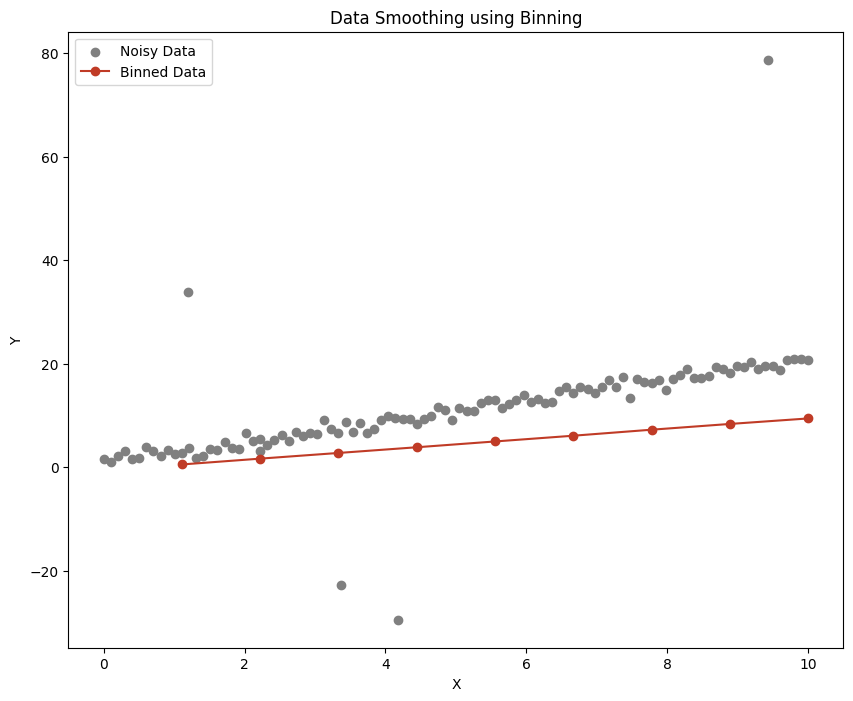

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(df["x"], df["y"], color="gray", label="Noisy Data")
plt.plot(bins, binned_data, color="#C03B26", label="Binned Data", marker="o")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Smoothing using Binning")
plt.legend()
plt.show()

## Step 5: Regression Technique

Linear regression can help reduce noise by fitting a model that captures the underlying trend.

In [6]:
# Regression: Fit a linear regression model to reduce noise
model = LinearRegression()
model.fit(df[["x"]], df["y"])
y_pred = model.predict(df[["x"]])

## Step 6: Visualize Regression Results

Let's see how regression captures the underlying trend in our noisy data.

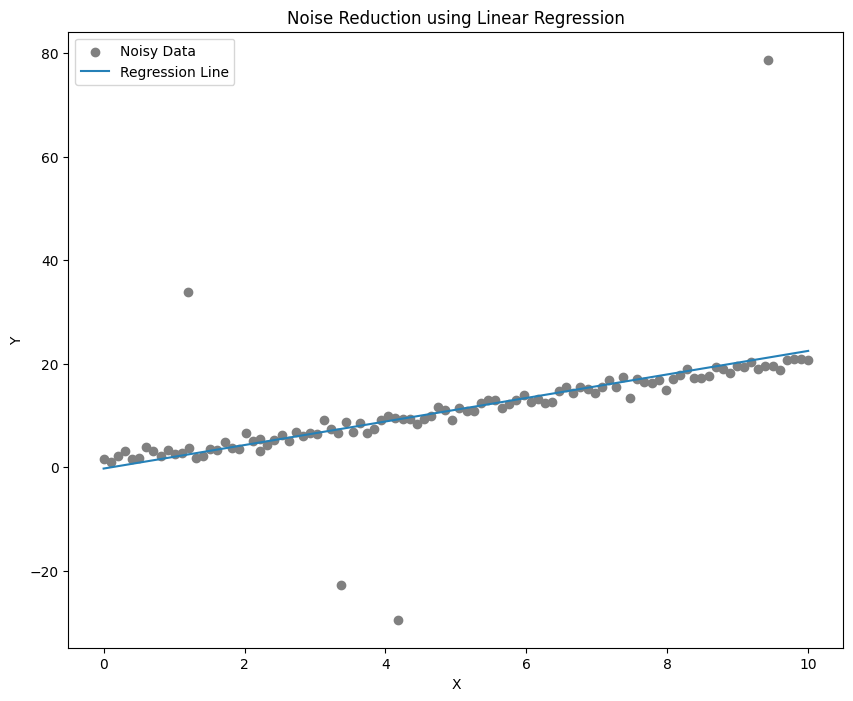

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(df["x"], df["y"], color="gray", label="Noisy Data")
plt.plot(df["x"], y_pred, color="#2580B7", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Noise Reduction using Linear Regression")
plt.legend()
plt.show()

## Step 7: Smoothing Technique

Moving average smoothing reduces noise by averaging neighboring data points.

In [8]:
# Smoothing: Apply a moving average to smooth the noisy data
smoothed_data = uniform_filter1d(df["y"], size=5)

## Step 8: Visualize Smoothing Results

Let's visualize the effect of moving average smoothing on our data.

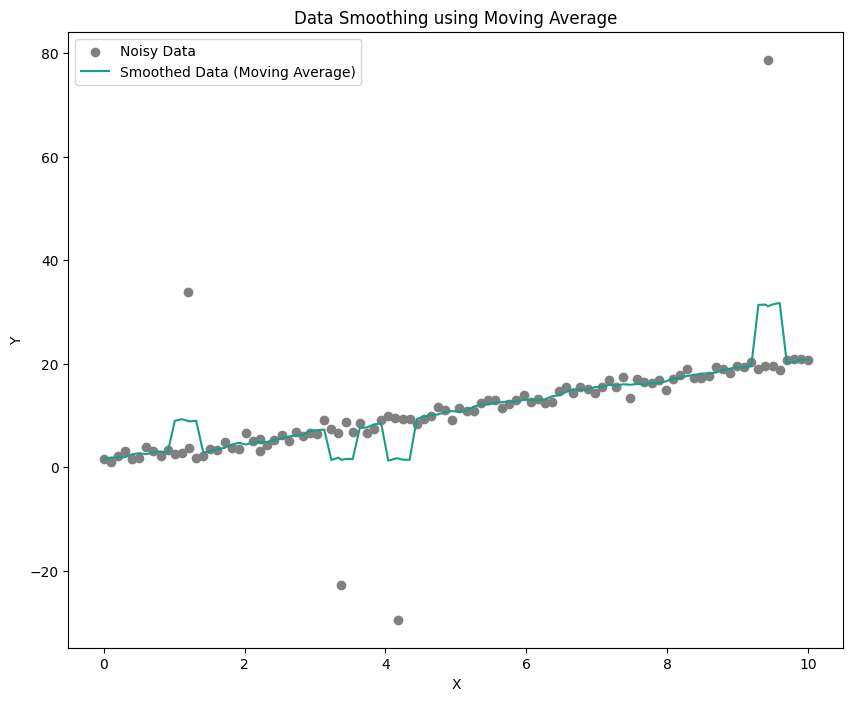

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(df["x"], df["y"], color="gray", label="Noisy Data")
plt.plot(df["x"], smoothed_data, color="#179E86",
         label="Smoothed Data (Moving Average)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Smoothing using Moving Average")
plt.legend()
plt.show()

## Step 9: Outlier Detection using Z-Score

The Z-score method identifies outliers as data points that are more than a certain number of standard deviations away from the mean.

In [10]:
# Outlier Detection: Using Z-score to detect and remove outliers
z_scores = np.abs(stats.zscore(df["y"]))
outliers = z_scores > 2  # Z-score threshold for outliers

# Remove outliers
df_no_outliers = df[~outliers]

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after outlier removal: {len(df_no_outliers)}")
print(f"Number of outliers detected: {outliers.sum()}")

Original dataset size: 105
Dataset size after outlier removal: 101
Number of outliers detected: 4


## Step 10: Visualize Outlier Detection Results

Let's see which data points were identified as outliers and removed.

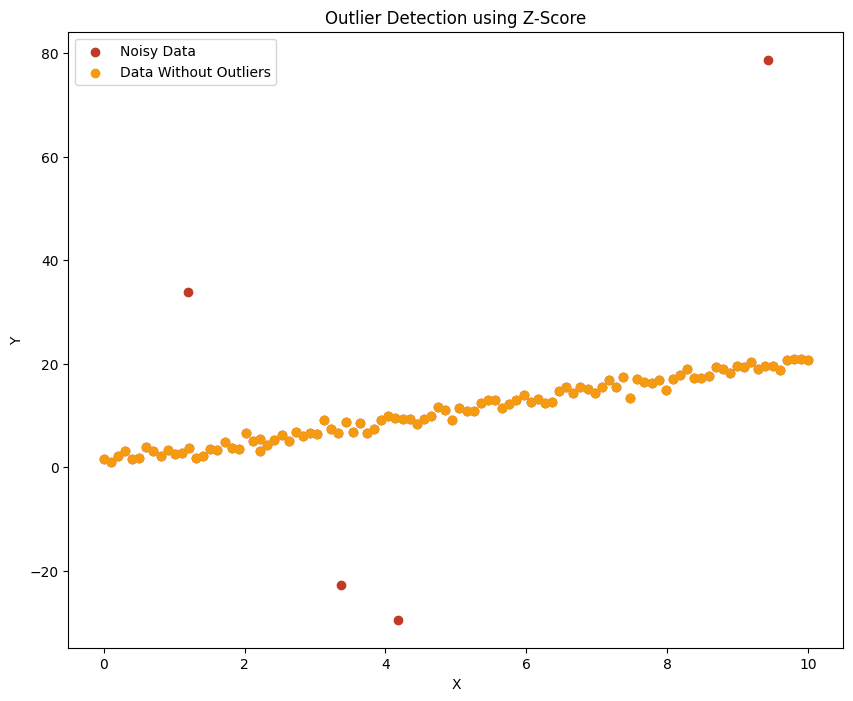

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(df["x"], df["y"], color="#C03B26", label="Noisy Data")
plt.scatter(df_no_outliers["x"], df_no_outliers["y"], color="#F59B11",
            label="Data Without Outliers")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Outlier Detection using Z-Score")
plt.legend()
plt.show()

## Summary

In this notebook, we explored four main approaches to deal with noisy data:

1. **Binning**: Groups data into bins and calculates means
   - Pros: Simple, reduces local noise effectively
   - Cons: Loss of data resolution, may miss fine-grained patterns

2. **Regression**: Fits a model to capture the underlying trend
   - Pros: Captures global patterns, interpretable
   - Cons: Assumes a specific functional form, may not work for complex relationships

3. **Smoothing (Moving Average)**: Averages neighboring data points
   - Pros: Preserves local trends, reduces high-frequency noise
   - Cons: Can blur sharp transitions, edge effects

4. **Outlier Detection**: Identifies and removes extreme values using Z-score
   - Pros: Removes obviously erroneous data points
   - Cons: May remove legitimate extreme values, sensitive to threshold choice

Each technique has its strengths and is suitable for different types of noise and data characteristics. Often, a combination of these methods provides the best results for data cleaning and preprocessing.